<a href="https://colab.research.google.com/github/TurboGoose/Optimization/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Коновалов Илья группа 19-Б05.ПУ

In [ ]:
from math import exp, inf, log, sqrt
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A = len("Коновалов")  # 9
B = len("Илья")       # 4
PRECISION = 5*1.e-7
RESULTS = dict()
call_count = 0

def function(x):      # Функция c подсчетом вызовов
    global call_count
    call_count += 1
    if x == 0:
        res = inf
    else:
        res = -log(x, B) + exp(A * x)
    return res


def f(x):             # Функция без подсчета вызовов
    if x == 0:
        res = inf
    else:
        res = -log(x, B) + exp(A * x)
    return res


def first_derivative(x):    # Первая производная
    global call_count
    call_count += 1
    if x == 0:
        res = - inf
    else:
        res = -1 / (log(B) * x) + A * exp(A * x)
    return res


def second_derivative(x):   # Вторая производная
    global call_count
    call_count += 1
    if x == 0:
        res = inf
    else:
        res = 1 / (log(B) * x ** 2) + A ** 2 * exp(A * x)
    return res

def drop_call_counter():
    global call_count
    call_count = 0;


def show_function():
    x = np.arange(1e-2, 0.1, 1e-5)
    fig = plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
    plt.title("Функция y(x)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    func = np.vectorize(lambda x: (inf if x==0 else -log(x, B) + exp(A * x)))
    plt.plot(x, func(x))


def truncate(f, n):
    if f == inf:
        return "inf"
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

def p(x):
    return truncate(x, 7)

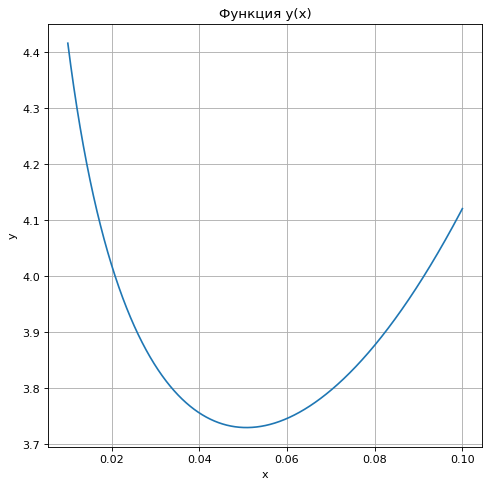

In [ ]:
show_function()

# **Метод пассивного поиска**


In [ ]:
def passive_search(a=0, b=1):
    start_time = time()
    iterations = 0
    x_min = a
    min_y = inf
    for x in np.arange(a, b, (b - a) / int((b - a)/PRECISION)):
        y = function(x)
        if y < min_y:
            x_min = x
            min_y = y
        iterations += 1
        if (call_count % 100000 == 0):
            print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(x), p(y), p(x_min), p(min_y), str(call_count)))
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Пассивный поиск"] = (iterations, call_count, elapsed_time_milliseconds)
    return x_min

drop_call_counter()
res_x = passive_search()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

100000) 0.0499994 (3.7292763) 0.0499994 (3.7292763) [100000]
200000) 0.0999994 (4.1205596) 0.0507580 (3.7291582) [200000]
300000) 0.1499994 (5.2258933) 0.0507580 (3.7291582) [300000]
400000) 0.1999995 (7.2105860) 0.0507580 (3.7291582) [400000]
500000) 0.2499994 (10.4876945) 0.0507580 (3.7291582) [500000]
600000) 0.2999995 (15.7481487) 0.0507580 (3.7291582) [600000]
700000) 0.3499994 (24.0932471) 0.0507580 (3.7291582) [700000]
800000) 0.3999995 (37.2590347) 0.0507580 (3.7291582) [800000]
900000) 0.4499995 (57.9732011) 0.0507580 (3.7291582) [900000]
1000000) 0.4999995 (90.5167269) 0.0507580 (3.7291582) [1000000]
1100000) 0.5499995 (141.6055775) 0.0507580 (3.7291582) [1100000]
1200000) 0.5999995 (221.7739032) 0.0507580 (3.7291582) [1200000]
1300000) 0.6499995 (347.5435626) 0.0507580 (3.7291582) [1300000]
1400000) 0.6999995 (544.8267466) 0.0507580 (3.7291582) [1400000]
1500000) 0.7499994 (854.2624385) 0.0507580 (3.7291582) [1500000]
1600000) 0.7999995 (1339.5857014) 0.0507580 (3.7291582) [

# **Метод дихотомии**


In [ ]:
def dichotomy_method(a=0, b=1):
    start_time = time()
    iterations = 0
    delta = PRECISION / 2
    while (b - a) / 2 > PRECISION:
        print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(a), p(f(a)), p(b), p(f(b)), str(call_count)))
        middle = (a + b) / 2
        c = middle - delta
        d = middle + delta
        if function(c) > function(d):
            a = c
        else:
            b = d
        iterations += 1
    print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(a), p(f(a)), p(b), p(f(b)), str(call_count)))
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Дихотомия"] = (iterations, call_count, elapsed_time_milliseconds)
    return (a + b) / 2

drop_call_counter()
res_x = dichotomy_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

0) 0.0000000 (inf) 1.0000000 (8103.0839275) [0]
1) 0.0000000 (inf) 0.5000002 (90.5173334) [2]
2) 0.0000000 (inf) 0.2500003 (10.4877667) [4]
3) 0.0000000 (inf) 0.1250004 (4.5802264) [6]
4) 0.0000000 (inf) 0.0625004 (3.7550566) [8]
5) 0.0312499 (3.8247849) 0.0625004 (3.7550566) [10]
6) 0.0468749 (3.7323366) 0.0625004 (3.7550566) [12]
7) 0.0468749 (3.7323366) 0.0546879 (3.7322140) [14]
8) 0.0468749 (3.7323366) 0.0507817 (3.7291583) [16]
9) 0.0488281 (3.7299302) 0.0507817 (3.7291583) [18]
10) 0.0498046 (3.7293451) 0.0507817 (3.7291583) [20]
11) 0.0502929 (3.7292025) 0.0507817 (3.7291583) [22]
12) 0.0505370 (3.7291682) 0.0507817 (3.7291583) [24]
13) 0.0506591 (3.7291602) 0.0507817 (3.7291583) [26]
14) 0.0507201 (3.7291585) 0.0507817 (3.7291583) [28]
15) 0.0507507 (3.7291582) 0.0507817 (3.7291583) [30]
16) 0.0507507 (3.7291582) 0.0507664 (3.7291582) [32]
17) 0.0507507 (3.7291582) 0.0507588 (3.7291582) [34]
18) 0.0507545 (3.7291582) 0.0507588 (3.7291582) [36]
19) 0.0507564 (3.7291582) 0.05075

# **Метод золотого сечения**

In [ ]:
def golden_ratio_method(a=0, b=1):
    start_time = time()
    iterations = 0
    d_coef = (sqrt(5) - 1) / 2
    c_coef = 1 - d_coef
    c = c_coef * (b - a) + a
    d = d_coef * (b - a) + a
    f_c = function(c)
    f_d = function(d)
    while (b - a) / 2 > PRECISION:
        print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(a), p(f(a)), p(b), p(f(b)), str(call_count)))
        if f_c > f_d:
            a = c
            c = d
            d = d_coef * (b - a) + a
            f_c = f_d
            f_d = function(d)
        else:
            b = d
            d = c
            c = c_coef * (b - a) + a
            f_d = f_c
            f_c = function(c)
        iterations += 1
    print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(a), p(f(a)), p(b), p(f(b)), str(call_count)))
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Золотое сечение"] = (iterations, call_count, elapsed_time_milliseconds)
    return (a + b) / 2

drop_call_counter()
res_x = golden_ratio_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

0) 0.0000000 (inf) 1.0000000 (8103.0839275) [2]
1) 0.0000000 (inf) 0.6180339 (260.7697737) [3]
2) 0.0000000 (inf) 0.3819660 (31.8093689) [4]
3) 0.0000000 (inf) 0.2360679 (9.4110106) [5]
4) 0.0000000 (inf) 0.1458980 (5.1060987) [6]
5) 0.0000000 (inf) 0.0901699 (3.9869535) [7]
6) 0.0344418 (3.7932400) 0.0901699 (3.9869535) [8]
7) 0.0344418 (3.7932400) 0.0688837 (3.7886880) [9]
8) 0.0344418 (3.7932400) 0.0557280 (3.7340091) [10]
9) 0.0425724 (3.7438690) 0.0557280 (3.7340091) [11]
10) 0.0475974 (3.7312505) 0.0557280 (3.7340091) [12]
11) 0.0475974 (3.7312505) 0.0526224 (3.7298567) [13]
12) 0.0495168 (3.7294757) 0.0526224 (3.7298567) [14]
13) 0.0495168 (3.7294757) 0.0514362 (3.7292515) [15]
14) 0.0502499 (3.7292111) 0.0514362 (3.7292515) [16]
15) 0.0502499 (3.7292111) 0.0509831 (3.7291685) [17]
16) 0.0505300 (3.7291689) 0.0509831 (3.7291685) [18]
17) 0.0507030 (3.7291588) 0.0509831 (3.7291685) [19]
18) 0.0507030 (3.7291588) 0.0508761 (3.7291611) [20]
19) 0.0507030 (3.7291588) 0.0508100 (3.72

# **Метод Фибоначчи**

In [ ]:
def fib(value):
    f1, f2 = 1, 1
    while f1 < value:
        yield f1
        f1, f2 = f2, f1 + f2
    yield f1

def fibonacci_method(a=0, b=1):
    start_time = time()
    iterations = 0
    fibs = list(fib((b - a) / PRECISION))
    n = len(fibs)
    d = a + (b - a) * fibs[n - 2] / fibs[n - 1]
    c = a + (b - a) * fibs[n - 3] / fibs[n - 1]
    f_c = function(c)
    f_d = function(d)
    for i in range(2, n):
        print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(a), p(f(a)), p(b), p(f(b)), str(call_count)))
        if f_c > f_d:
            a = c
            c = d
            d = a + (b - a) * fibs[n - 1 - i] / fibs[n - i]
            f_c = f_d
            f_d = function(d)
        else:
            b = d
            d = c
            c = a + (b - a) * fibs[n - 2 - i] / fibs[n - i]
            f_d = f_c
            f_c = function(c)
        iterations += 1
    print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(a), p(f(a)), p(b), p(f(b)), str(call_count))) 
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Фибоначчи"] = (iterations, call_count, elapsed_time_milliseconds)
    return (a + b) / 2

drop_call_counter()
res_x = fibonacci_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

0) 0.0000000 (inf) 1.0000000 (8103.0839275) [2]
1) 0.0000000 (inf) 0.6180339 (260.7697737) [3]
2) 0.0000000 (inf) 0.3819660 (31.8093689) [4]
3) 0.0000000 (inf) 0.2360679 (9.4110106) [5]
4) 0.0000000 (inf) 0.1458980 (5.1060987) [6]
5) 0.0000000 (inf) 0.0901699 (3.9869535) [7]
6) 0.0344418 (3.7932400) 0.0901699 (3.9869535) [8]
7) 0.0344418 (3.7932400) 0.0688837 (3.7886880) [9]
8) 0.0344418 (3.7932400) 0.0557280 (3.7340091) [10]
9) 0.0425724 (3.7438690) 0.0557280 (3.7340091) [11]
10) 0.0475974 (3.7312505) 0.0557280 (3.7340091) [12]
11) 0.0475974 (3.7312505) 0.0526224 (3.7298567) [13]
12) 0.0495168 (3.7294757) 0.0526224 (3.7298567) [14]
13) 0.0495168 (3.7294757) 0.0514362 (3.7292515) [15]
14) 0.0502499 (3.7292111) 0.0514362 (3.7292515) [16]
15) 0.0502499 (3.7292111) 0.0509831 (3.7291685) [17]
16) 0.0505300 (3.7291689) 0.0509831 (3.7291685) [18]
17) 0.0507030 (3.7291588) 0.0509831 (3.7291685) [19]
18) 0.0507030 (3.7291588) 0.0508761 (3.7291611) [20]
19) 0.0507030 (3.7291588) 0.0508100 (3.72

# **Метод касательных**

In [ ]:
def tangent_method(a=1.e-3, b=0.25):
    start_time = time()
    iterations = 0
    f_a = function(a)
    f_b = function(b)
    df_a = first_derivative(a)
    df_b = first_derivative(b)
    while abs(b - a) > PRECISION:
        print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(a), p(f(a)), p(b), p(f(b)), str(call_count)))
        c = (f_b - f_a + df_a * a - df_b * b) / (df_a - df_b)
        df_c = first_derivative(c)
        f_c = function(c)
        if df_c > 0:
            b = c
            df_b = df_c
            f_b = f_c
        elif df_c < 0:
            a = c
            df_a = df_c
            f_a = f_c
        else:
            break
        iterations += 1
    print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(a), p(f(a)), p(b), p(f(b)), str(call_count)))
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Касательные"] = (iterations, call_count, elapsed_time_milliseconds)
    return (a + b) / 2

drop_call_counter()
res_x = tangent_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

0) 0.0010000 (5.9919327) 0.2500000 (10.4877358) [4]
1) 0.0211916 (3.9903058) 0.2500000 (10.4877358) [6]
2) 0.0211916 (3.9903058) 0.1383706 (4.9007965) [8]
3) 0.0211916 (3.9903058) 0.0647360 (3.7653754) [10]
4) 0.0368915 (3.7740693) 0.0647360 (3.7653754) [12]
5) 0.0491744 (3.7296765) 0.0647360 (3.7653754) [14]
6) 0.0491744 (3.7296765) 0.0565778 (3.7357699) [16]
7) 0.0491744 (3.7296765) 0.0527748 (3.7299746) [18]
8) 0.0491744 (3.7296765) 0.0509486 (3.7291656) [20]
9) 0.0500550 (3.7292596) 0.0509486 (3.7291656) [22]
10) 0.0505002 (3.7291718) 0.0509486 (3.7291656) [24]
11) 0.0507240 (3.7291585) 0.0509486 (3.7291656) [26]
12) 0.0507240 (3.7291585) 0.0508362 (3.7291595) [28]
13) 0.0507240 (3.7291585) 0.0507801 (3.7291583) [30]
14) 0.0507520 (3.7291582) 0.0507801 (3.7291583) [32]
15) 0.0507520 (3.7291582) 0.0507660 (3.7291582) [34]
16) 0.0507520 (3.7291582) 0.0507590 (3.7291582) [36]
17) 0.0507555 (3.7291582) 0.0507590 (3.7291582) [38]
18) 0.0507573 (3.7291582) 0.0507590 (3.7291582) [40]
19) 

# **Метод Ньютона-Рафсона**

In [ ]:
def newton_raphson_method(x=1):
    start_time = time()
    iterations = 0
    df_x = first_derivative(x)
    while abs(df_x) > PRECISION:
        d2f_x = second_derivative(x)
        print("{}) {} | {} | {} [{}]".format(str(iterations), p(x), p(df_x), p(d2f_x), str(call_count)))
        x = x - df_x / d2f_x
        df_x = first_derivative(x)
        iterations += 1
    print("{}) {} | {} | {} [{}]".format(str(iterations), p(x), p(df_x), p(d2f_x), str(call_count)))
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Ньютон-Рафсон"] = (iterations, call_count, elapsed_time_milliseconds)
    return x

drop_call_counter()
res_x = newton_raphson_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

0) 1.0000000 | 72927.0340006 | 656350.5194811 [2]
1) 0.8888901 | 26828.1052241 | 241461.1636042 [4]
2) 0.7777827 | 9869.2153178 | 88832.4772442 [6]
3) 0.6666836 | 3630.3305512 | 32684.3358550 [8]
4) 0.5556111 | 1335.0881618 | 12029.8148163 [10]
5) 0.4446295 | 490.5800995 | 4433.4708860 [12]
6) 0.3339757 | 179.6581842 | 1642.8297515 [14]
7) 0.2246167 | 64.7387852 | 625.8496935 [16]
8) 0.1211753 | 20.8310295 | 290.1820673 [18]
9) 0.0493893 | -0.5678967 | 422.0556975 [20]
10) 0.0507348 | -0.0095194 | 408.1173008 [22]
11) 0.0507581 | -0.0000027 | 407.8866456 [24]
12) 0.0507581 | -0.0000000 | 407.8866456 [25]

Количество итераций: 12
Количество вызовов функции: 25
Затраченное время (миллисекунды): 0.726
Результат: x = 0.05075, f(x) = 3.729


# **Метод секущих**

In [ ]:
def secant_method(x1=1.e-3, x2=5*1.e-3):
    start_time = time()
    iterations = 0
    df_x1 = first_derivative(x1)
    df_x2 = first_derivative(x2)
    while abs(x2 - x1) > PRECISION:
        print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(x1), p(df_x1), p(x2), p(df_x2), str(call_count)))
        x1, x2 = x2, x2 - (x2 - x1) / (df_x2 - df_x1) * df_x2
        df_x1 = df_x2
        df_x2 = first_derivative(x2)
        iterations += 1
    print("{}) {} ({}) {} ({}) [{}]".format(str(iterations), p(x1), p(df_x1), p(x2), p(df_x2), str(call_count)))
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Секущие"] = (iterations, call_count, elapsed_time_milliseconds)
    return (x1 + x2) / 2

drop_call_counter()
res_x = secant_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

0) 0.0010000 (-712.2661548) 0.0050000 (-134.8552533) [2]
1) 0.0050000 (-134.8552533) 0.0059342 (-112.0637980) [3]
2) 0.0059342 (-112.0637980) 0.0105276 (-58.6250399) [4]
3) 0.0105276 (-58.6250399) 0.0155668 (-35.9852023) [5]
4) 0.0155668 (-35.9852023) 0.0235764 (-19.4686201) [6]
5) 0.0235764 (-19.4686201) 0.0330177 (-9.7330120) [7]
6) 0.0330177 (-9.7330120) 0.0424564 (-3.8019662) [8]
7) 0.0424564 (-3.8019662) 0.0485069 (-0.9446175) [9]
8) 0.0485069 (-0.9446175) 0.0505071 (-0.1027024) [10]
9) 0.0505071 (-0.1027024) 0.0507511 (-0.0028641) [11]
10) 0.0507511 (-0.0028641) 0.0507581 (-0.0000087) [12]
11) 0.0507581 (-0.0000087) 0.0507581 (-0.0000000) [13]

Количество итераций: 11
Количество вызовов функции: 13
Затраченное время (миллисекунды): 0.737
Результат: x = 0.05075, f(x) = 3.729


# **Результаты**

Все результаты

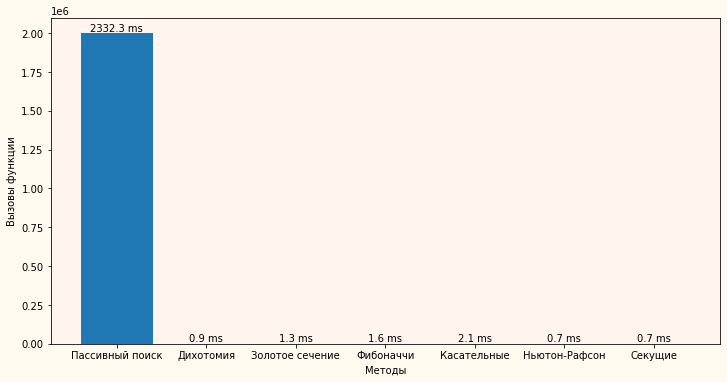

In [ ]:
def show_all_results():
    fig, ax = plt.subplots()
    for method, (iter, oper, time) in RESULTS.items():
        ax.bar(method, oper)
    plt.xlabel('Методы')
    plt.ylabel('Вызовы функции')
    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    rects = ax.patches
    for rect, stats in zip(rects, RESULTS.values()):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, "{:.1f} ms".format(stats[2]), ha='center', va='bottom')
    plt.show()

show_all_results()

Результаты без учета метода пассивного поиска

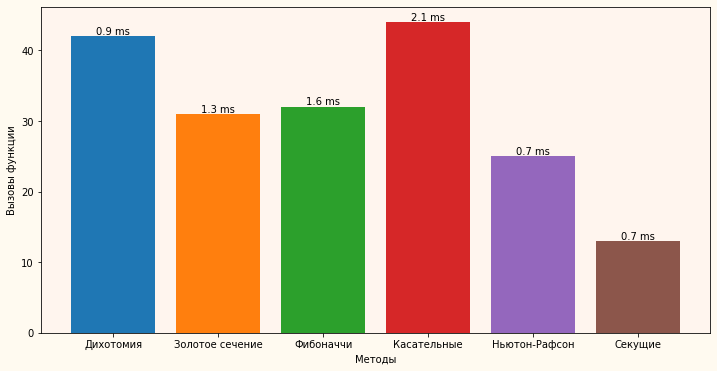

In [ ]:
def show_results_without_passive_search():
    RESULTS.pop("Пассивный поиск", None)
    fig, ax = plt.subplots()
    for method, (iter, oper, time) in RESULTS.items():
        ax.bar(method, oper)
    plt.xlabel('Методы')
    plt.ylabel('Вызовы функции')
    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    rects = ax.patches
    for rect, stats in zip(rects, RESULTS.values()):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, "{:.1f} ms".format(stats[2]), ha='center', va='bottom')
    plt.show()

show_results_without_passive_search()